In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the class for Lattice
class Lattice(object):
    """A user-defined data structure that stores and manipulates lattice (2D - arrays)
    """

    def __init__(self, width, height, p):
        """Constructs a board of width and height"""
        self.height = height
        self.width = width
        self.data = np.random.rand(self.height, self.width)
        self.p = p
        self.clusters = []
        self.visited = set()

        for i in range(0, height):
            for j in range(0, width):
                # if a random number is less than the probability picked, fill the lattice
                if self.data[i][j] <= self.p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
    
    def __repr__(self):
        """Creates a 2D representation of the board object"""
        plt.imshow(self.data, cmap='gray')
        plt.show()
        return ""
    

    def clear(self):
        """clears the board, making the board only contain ' ' strings
        Return: nothing, the 2D array is changed
        """
        for i in range(0, self.height):
            for j in range(0, self.width):
                # clears the data and all of the arrays that have to do with the data
                self.data[i][j] = 0
                self.clusters = []
                self.visited.clear()
                
    def random_populate(self, new_p):
        self.data = np.random.rand(self.height, self.width)
        for i in range(0, self.height):
            for j in range(0, self.width):
                # if a random number is less than the probability picked, fill the lattice
                if self.data[i][j] <= new_p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
        return self
    
    def populate(self, new_data):
        '''populates a lattice with an nxm list of lists'''
        self.data = new_data
    
    def get_data(self):
        '''returns information in the lattice as a list of lists'''
        return self.data
    
    def color_spanning_cluster(self):
        """Colors spanning clusters """
        num_clusters, clusters, spanning = self.get_clusters()
        span_data = self.data
        if spanning != []:
            for i in range(self.height):
                for j in range(self.width):
                    if (i, j) in spanning[0]:
                        span_data[i][j] = -1
            plt.imshow(span_data, cmap='gray')
            plt.show()
        return ""

    def get_clusters(self):
        """From a lattice, returns the number of clusters, the list of clusters and the tuples for each cell that
        makes up the cluster, and any spanning cluster. """
        
        span_clusters = []
        
        # find all clusters, double counting is ok
        for i in range(self.height):
            for j in range(self.width):
                if self.data[i][j] == 1 and (i, j) not in self.visited:
                    cluster = self.finish_cluster(i,j)
                    self.clusters.append(cluster)

        # assume we are always doing squares
        for cluster in self.clusters:
            if len(cluster) >= self.height and cluster not in span_clusters:
                for cell in cluster:
                    # if the cluster has a cell at row = 0 and col = 0
                    if cell[0] == 0 and cell[1] == 0:
                        for second_cell in cluster:
                            if (second_cell[0] == self.width - 1) or (second_cell[1] == self.height - 1):
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                        
                    # if the cluster has a cell at col = 0
                    if cell[0] == 0 and cell[1] != 0:
                        for second_cell in cluster:
                            if second_cell[0] == self.width - 1:
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                                
                                
                    # if the cluster has a cell at row = 0
                    if cell[1] == 0 and cell[0] != 0:
                        for second_cell in cluster:
                            if second_cell[1] == self.height - 1:
                                if cluster not in span_clusters:
                                    span_clusters.append(cluster)
                                break
                                


        
        num_clusters = len(self.clusters)      
        return num_clusters, self.clusters, span_clusters
    
    def finish_cluster(self, i, j):
        """Helper function to get_clusters. finish_cluster is a recursive function that returns all adjacent
        cells to a given cell that read 1. Returns a list """
        returnList = []
        stack = [(i, j)]
        while stack: 
            # print(1)
            # print(f"Stack Before: {stack}")
            node = stack.pop(0)
            r = node[0]
            c = node[1]
            if not (0 <= r < self.height and 0 <= c < self.width):
                continue
            if self.data[r][c] != 1 or (r, c) in self.visited:
                continue
            
            self.visited.add((r, c))
            returnList.append(node)
            directions = [[1, 0], [0, 1], [-1, 0], [0, -1]]
            for dr, dc in directions:
                newRow = r + dr
                newCol = c + dc
                stack.append((newRow, newCol))
            # print(f"Stack After: {stack}")
        
        return returnList



Number of clusters: 5
Number of Spanning Clusters: 1


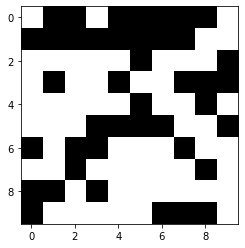

In [20]:
lattice = Lattice(10,10,0.6)
#lattice.populate(LoL)
num_clusters, clusters, spanning = lattice.get_clusters()
print(f"Number of clusters: {num_clusters}")
print(f"Number of Spanning Clusters: {len(spanning)}")
lattice

In [119]:
num_clusters, clusters, spanning = lattice.get_clusters()

print(f"Number of clusters: {num_clusters}")
print()
print(f"Clusters: \n {clusters}")
print()
print(f"Number of Spanning Clusters: {len(spanning)}")
print()
print(f"Spanning Clusters: \n {spanning}")

Number of clusters: 7

Clusters: 
 [[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (2, 1), (1, 1)], [(0, 3), (1, 3), (2, 3), (2, 4), (1, 4), (1, 5), (1, 6), (0, 6), (1, 7), (1, 8), (0, 8)], [(3, 5)], [(3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (8, 7), (7, 7), (7, 6), (6, 6), (5, 6), (8, 6), (9, 6), (9, 5), (8, 5), (8, 4), (9, 4), (9, 3), (8, 3), (7, 3), (6, 3), (6, 4), (5, 4), (7, 2), (9, 2), (9, 1), (8, 1), (8, 0), (9, 0), (6, 9), (4, 9), (3, 9), (4, 7)], [(4, 3)], [(6, 0)], [(9, 9)]]

Number of Spanning Clusters: 0

Spanning Clusters: 
 []


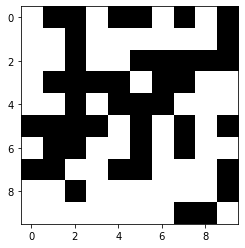

In [125]:
#LoL = lattice.get_data()
#newlattice = Lattice(10,10,0)
newlattice.populate(LoL)
newlattice

In [128]:
newlattice
len(newlattice.get_clusters()[2])

0

In [127]:
num_clusters, clusters, spanning = newlattice.get_clusters()

print(f"Number of clusters: {num_clusters}")
print()
print(f"Clusters: \n {clusters}")
print()
print(f"Number of Spanning Clusters: {len(spanning)}")
print()
print(f"Spanning Clusters: \n {spanning}")

Number of clusters: 7

Clusters: 
 [[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (2, 1), (1, 1)], [(0, 3), (1, 3), (2, 3), (2, 4), (1, 4), (1, 5), (1, 6), (0, 6), (1, 7), (1, 8), (0, 8)], [(3, 5)], [(3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (8, 7), (7, 7), (7, 6), (6, 6), (5, 6), (8, 6), (9, 6), (9, 5), (8, 5), (8, 4), (9, 4), (9, 3), (8, 3), (7, 3), (6, 3), (6, 4), (5, 4), (7, 2), (9, 2), (9, 1), (8, 1), (8, 0), (9, 0), (6, 9), (4, 9), (3, 9), (4, 7)], [(4, 3)], [(6, 0)], [(9, 9)]]

Number of Spanning Clusters: 0

Spanning Clusters: 
 []


Now the idea is to use p = 0.6 on a lot of different sized arrays, and extract the average number of spanning clusters
I need a function that takes in the number of trials and the board size. It could also take in p if I want to be able to change that more easily
It will output a list of the number of spanning clusters in each trial

In [21]:
def cbs(board_side_length, trials, p):
    '''for a number of trials trials, makes a square board with side board_side_length and probability p, 
    and gives a list of the number of spanning clusters in each trial'''
    output = []
    for n in range(trials):
        lattice = Lattice(board_side_length, board_side_length, p)
        output += [len(lattice.get_clusters()[2])]
        #print(lattice)
        lattice.clear
    return output

In [31]:
def stdev(L):
    '''returns the sample standard deviation of a list of numbers'''
    mean = sum(L)/len(L)
    devs = [] # will add squares of deviations
    for x in L:
        devs += [(x - mean)**2]
    return np.sqrt(sum(devs)/(len(L)-1))

In [58]:
L = cbs(20,100,.6)
print(f"average number of spanning clusters: {sum(L)/len(L)}")
#print(f"standard deviation: {stdev(L)}") # standard deviation of a bunch of 1's and 0's is useless
# get average and standard deviation and plot for various board sizes

# really, we want some kind of limiting value, with error, on what the average number of spanning clusters is 
# so I need a standard deviation on a bunch of trials on this
# I run 100 trials a bunch of times, get an average and stdev on that, and plot it

average number of spanning clusters: 0.75


In [94]:
def data_generation(board_size, p):
    '''trying to find the limiting value of the number of spanning clusters, with a confidence interval
    going to work by doing a bunch of rounds of trials, then finding their mean and standard deviation'''
    tpr = 30 # trials per round
    rounds = 30 # number of rounds
    L = [sum(cbs(board_size, tpr, p))/tpr for i in range(rounds)] # list of average of the trials in each round
    return sum(L)/len(L), stdev(L) # returns first mean, then stdev

#data_generation(80, 0.6)

(0.8300000000000002, 0.0827450499729087)

Some results: with 100 trials per round, and 50 rounds, I get
board size  avg      stdev

5           0.7344   0.0513
10          0.7494   0.0465
20          0.7554   0.0428
40          0.7938   0.0479
80          0.8396   0.0371

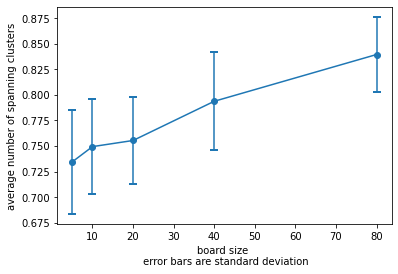

In [125]:
x = [5, 10, 20, 40, 80]
y = [ 0.7344, 0.7494, 0.7554, 0.7938, 0.8396]
yerr = [0.0513, 0.0465, 0.0428, 0.0479, 0.0371]

fig, ax = plt.subplots()
#ax.plot(x, y, 'o')
plt.errorbar(x,y, yerr=yerr, marker='o', capthick=2, capsize=4)
ax.set_xlabel("board size \n error bars are standard deviation")
ax.set_ylabel("average number of spanning clusters");

# ideally, this graph would have a log scale on the x-axis, not have the lines be connected

# there is an upward trend, not a big one but definitely present